<a href="https://colab.research.google.com/github/Bhavana123448/NLP1/blob/main/NLPLAB05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from spacy.matcher import Matcher

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [9]:
import zipfile

with zipfile.ZipFile("arxiv_data.csv.zip", 'r') as zip_ref:
    zip_ref.extractall(".")
df = pd.read_csv("arxiv_data.csv")
print(df.columns)
df = df[df["terms"].str.contains("cs", na=False)]
texts = df["summaries"].dropna().tolist()

Index(['titles', 'summaries', 'terms'], dtype='object')


In [13]:
nltk.download('punkt_tab')
stop_words = set(stopwords.words("english"))

nltk_tokens = []
for text in texts[:500]:
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    nltk_tokens.extend(tokens)

nltk_freq = Counter(nltk_tokens).most_common(10)
print("NLTK Top Tokens:", nltk_freq)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


NLTK Top Tokens: [('segmentation', 1619), ('image', 1130), ('learning', 519), ('data', 462), ('images', 451), ('method', 419), ('medical', 403), ('model', 401), ('network', 392), ('proposed', 336)]


In [14]:
nlp = spacy.load("en_core_web_sm")
docs = list(nlp.pipe(texts[:500], batch_size=50))

In [15]:
noun_phrases = [
    chunk.text.lower()
    for doc in docs
    for chunk in doc.noun_chunks
]

np_freq = Counter(noun_phrases).most_common(10)
print("spaCy Noun Phrases:", np_freq)

spaCy Noun Phrases: [('we', 1295), ('which', 425), ('that', 326), ('it', 281), ('this paper', 195), ('the-art', 191), ('image segmentation', 148), ('our method', 115), ('-', 99), ('this work', 98)]


In [16]:
entities = [
    ent.label_
    for doc in docs
    for ent in doc.ents
]

ent_freq = Counter(entities)
print("Entity Frequencies:", ent_freq)


Entity Frequencies: Counter({'ORG': 1353, 'CARDINAL': 761, 'PERSON': 184, 'PERCENT': 150, 'ORDINAL': 143, 'GPE': 113, 'DATE': 80, 'NORP': 68, 'PRODUCT': 35, 'MONEY': 26, 'WORK_OF_ART': 16, 'FAC': 14, 'QUANTITY': 9, 'TIME': 7, 'LOC': 7, 'LAW': 4, 'EVENT': 2})


In [17]:
matcher = Matcher(nlp.vocab)

patterns = [
    [{"POS": "ADJ"}, {"POS": "NOUN"}],
    [{"POS": "NOUN"}, {"POS": "NOUN"}],
    [{"LOWER": "machine"}, {"LOWER": "learning"}]
]

matcher.add("TECH_TERMS", patterns)

tech_terms = []
for doc in docs:
    for _, start, end in matcher(doc):
        tech_terms.append(doc[start:end].text.lower())

tech_freq = Counter(tech_terms).most_common(10)
print("Matched Technical Terms:", tech_freq)

Matched Technical Terms: [('image segmentation', 525), ('medical image', 202), ('semantic segmentation', 122), ('deep learning', 117), ('neural networks', 77), ('segmentation tasks', 69), ('neural network', 58), ('experimental results', 56), ('computer vision', 51), ('medical images', 50)]


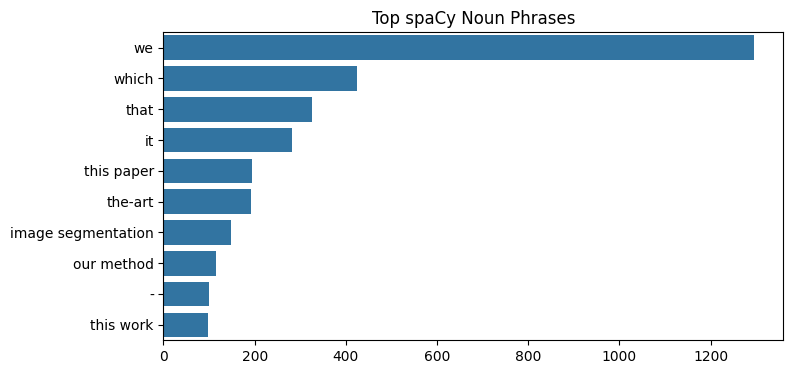

In [18]:
labels, counts = zip(*np_freq)
plt.figure(figsize=(8,4))
sns.barplot(x=list(counts), y=list(labels))
plt.title("Top spaCy Noun Phrases")
plt.show()

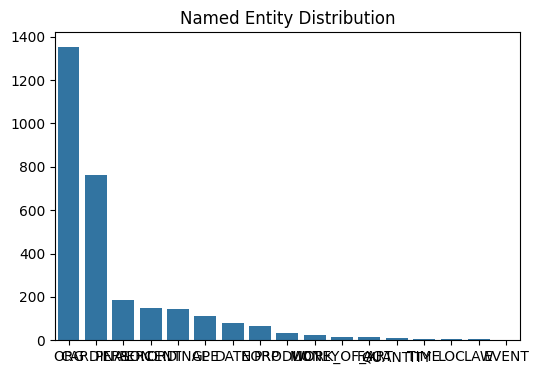

In [21]:
labels, counts = zip(*ent_freq.most_common())
plt.figure(figsize=(6,4))
sns.barplot(x=list(labels), y=list(counts))
plt.title("Named Entity Distribution")
plt.show()